<a href="https://colab.research.google.com/github/Dharma-Ranganathan/AllAboutPython/blob/main/ML_Projects_Codes/CaloriesBurntPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Calories burning prediction using regression models**

#**Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split

In [3]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

#**Data Collection & Pre-processing**

**Data Collection**

In [4]:
# calories dataset
calories = pd.read_csv('/content/drive/MyDrive/Colab_python/calories.csv')

# check
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
# exercise dataset
exercise = pd.read_csv('/content/drive/MyDrive/Colab_python/exercise.csv')

# check
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


**Concating calories and exercise dataset together**

In [9]:
# concatenate
calories_burnt = pd.concat([exercise, calories['Calories']],axis=1)

# check
calories_burnt.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


**Pre-processing**

In [10]:
# check information
calories_burnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [11]:
# check null values
calories_burnt.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


* seems no null values

#**Data Visualization**

<Axes: xlabel='Age', ylabel='Count'>

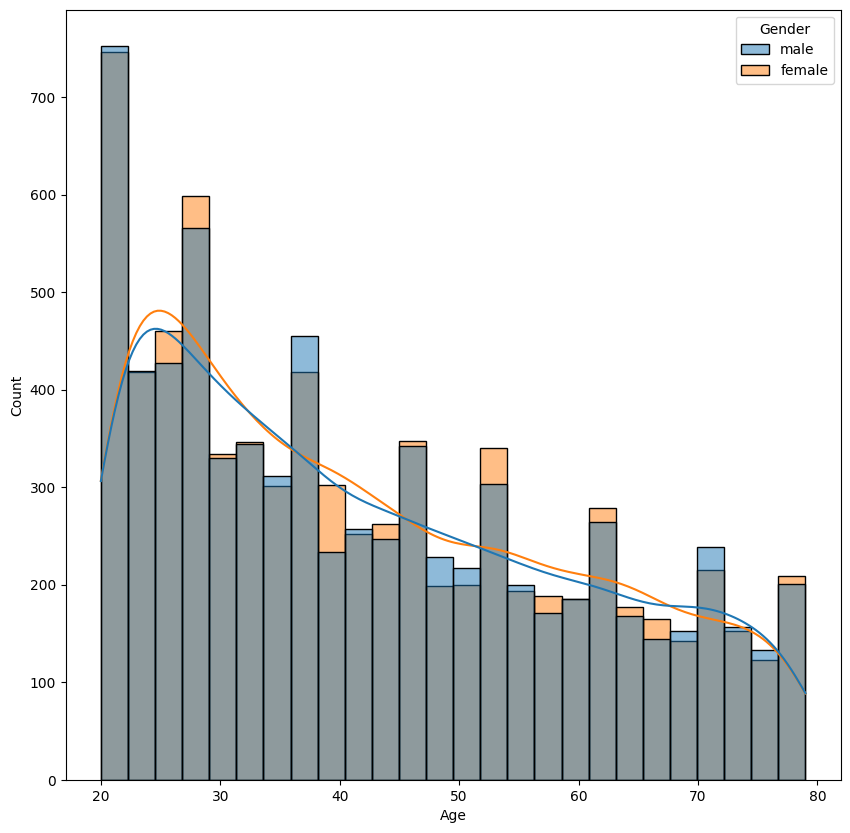

In [20]:
# distribution of age
plt.figure(figsize=(10,10))
sns.histplot(x='Age',data=calories_burnt,hue='Gender',kde=True)

* positive left skewed

<Axes: xlabel='Height', ylabel='Count'>

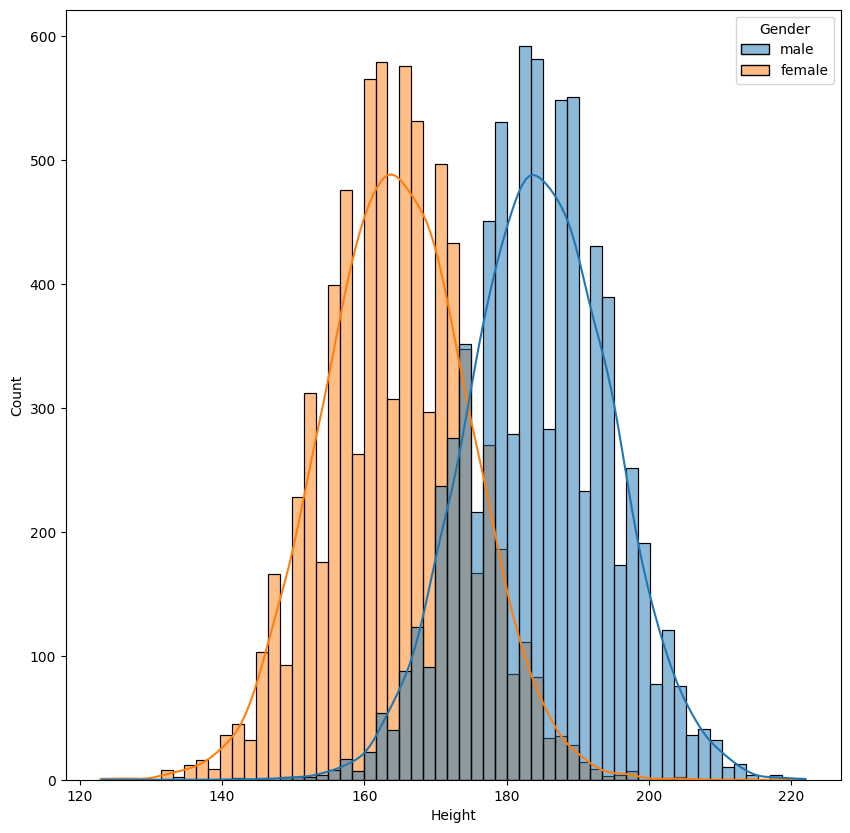

In [21]:
# distribution of height
plt.figure(figsize=(10,10))
sns.histplot(x='Height',data=calories_burnt,hue='Gender',kde=True)

* normal distribution occured

<Axes: xlabel='Weight', ylabel='Count'>

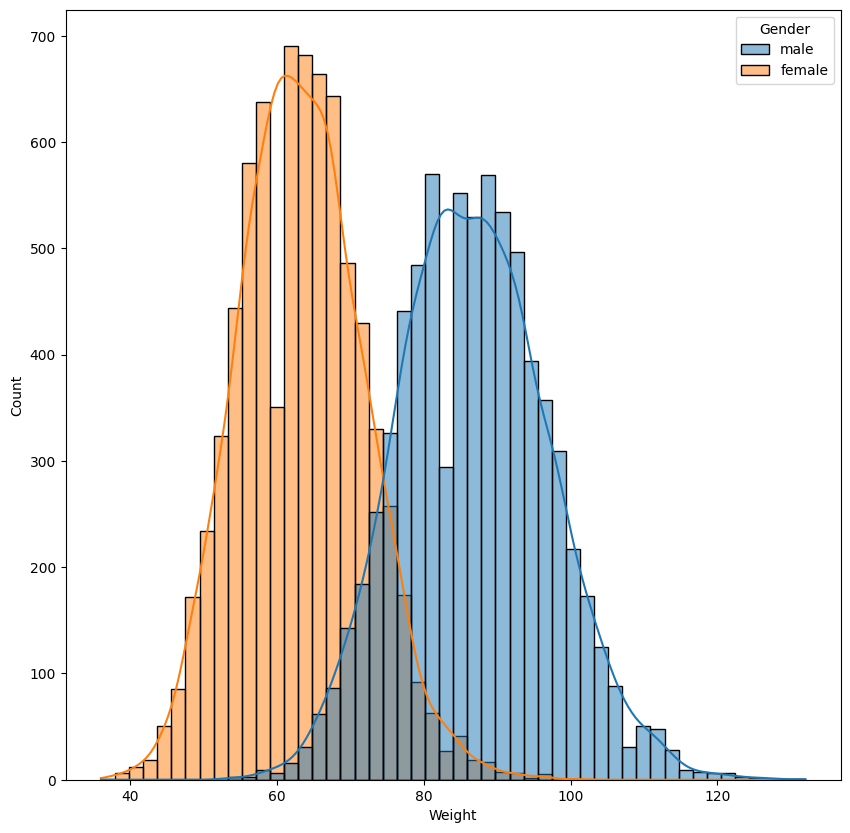

In [23]:
# distribution of Weight
plt.figure(figsize=(10,10))
sns.histplot(x='Weight',data=calories_burnt,hue='Gender',kde=True)

* normal distribution occured

<Axes: xlabel='Duration', ylabel='Count'>

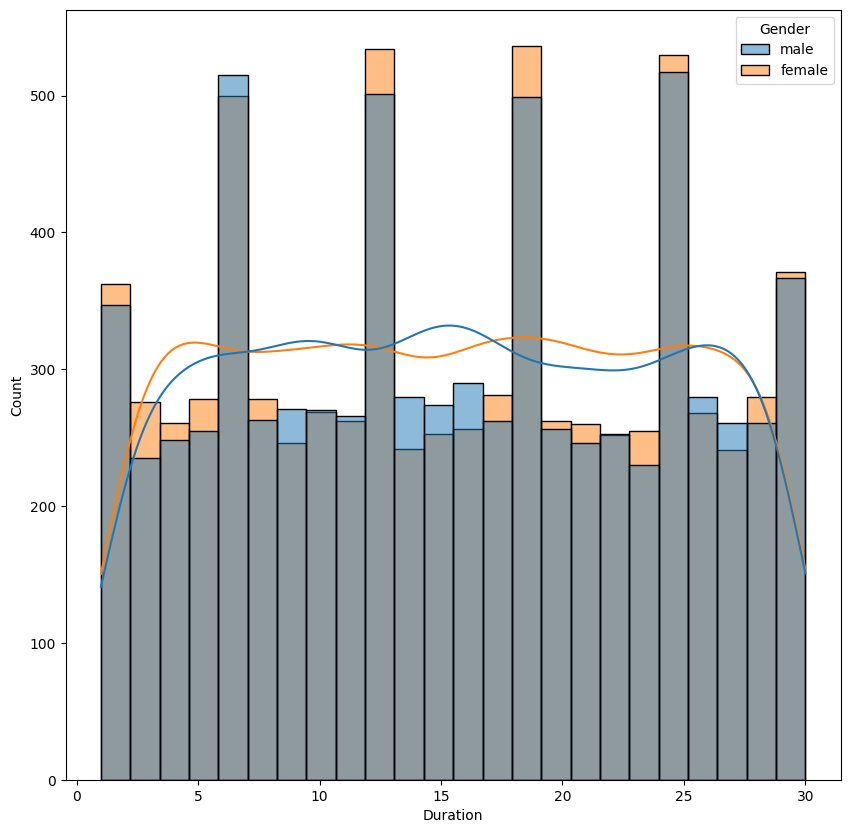

In [24]:
# distribution of duration
plt.figure(figsize=(10,10))
sns.histplot(x='Duration',data=calories_burnt,hue='Gender',kde=True)

* random abnormal distribution occured

<Axes: xlabel='Heart_Rate', ylabel='Count'>

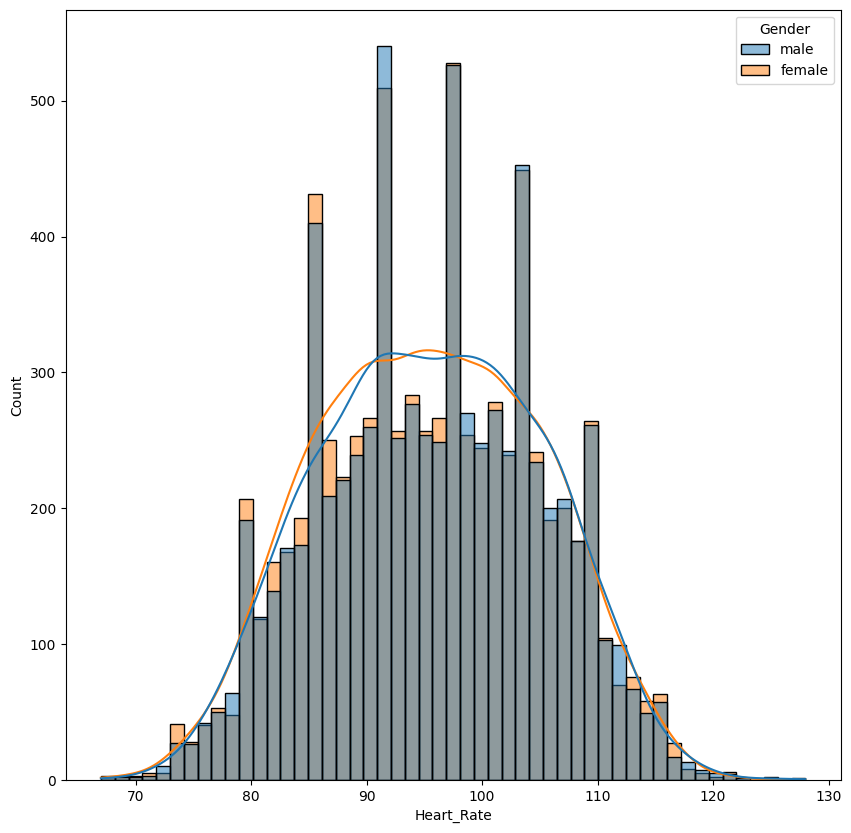

In [25]:
# distribution of heart rate
plt.figure(figsize=(10,10))
sns.histplot(x='Heart_Rate',data=calories_burnt,hue='Gender',kde=True)

* normal distribution occured

<Axes: xlabel='Body_Temp', ylabel='Count'>

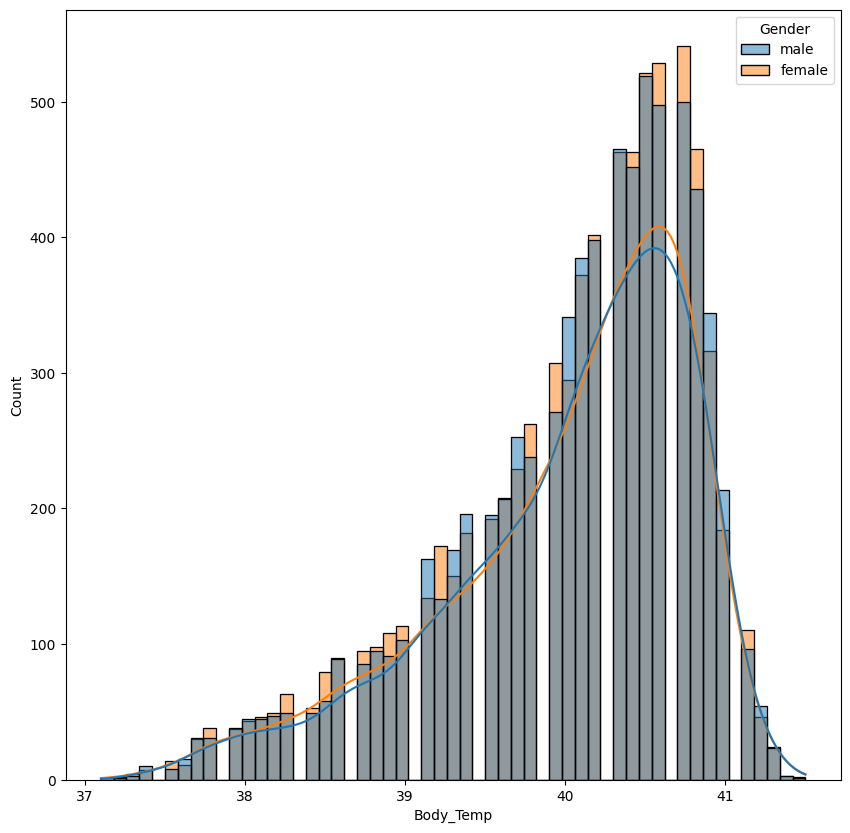

In [26]:
# distribution of body temperature
plt.figure(figsize=(10,10))
sns.histplot(x='Body_Temp',data=calories_burnt,hue='Gender',kde=True)

* positive right skewed

<Axes: xlabel='Calories', ylabel='Count'>

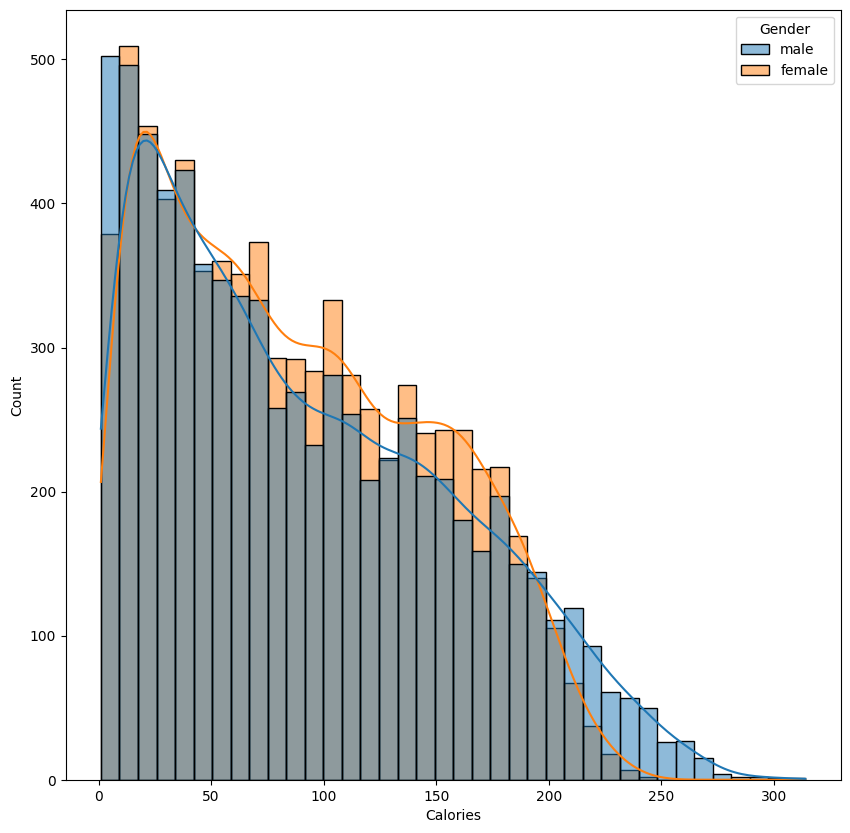

In [27]:
# distribution of calories
plt.figure(figsize=(10,10))
sns.histplot(x='Calories',data=calories_burnt,hue='Gender',kde=True)

* postive left skewed

**Inference: 'based on gender' , female & male around age 20 - 30, female & male around height 160 - 190, female & male around weight 60 - 90 were hitting gym. Most of the female hitting gym more than male states that they will probably have high weight and body mass.**

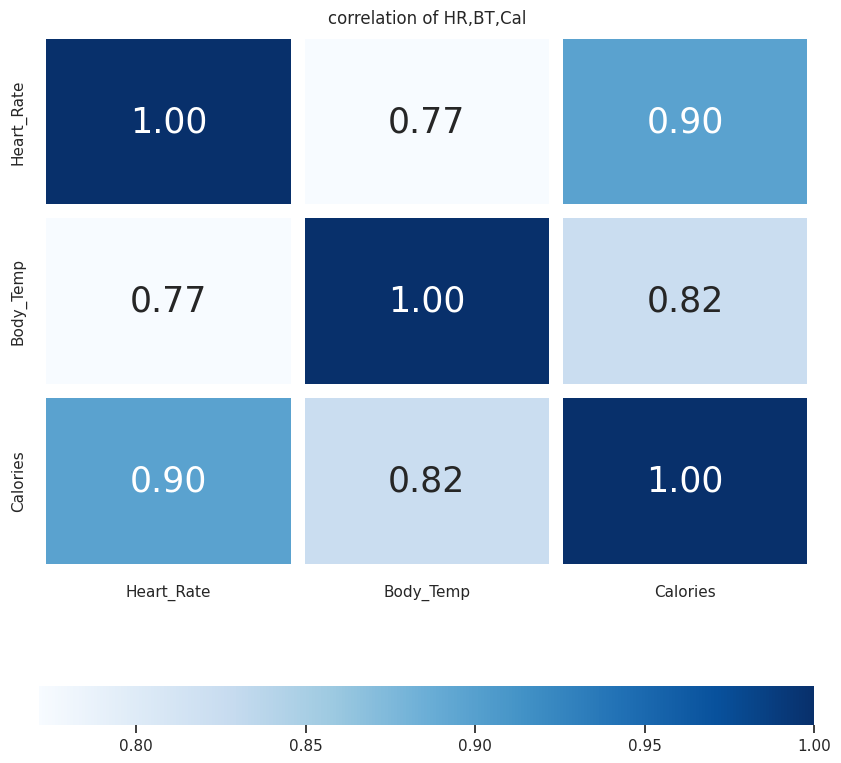

In [36]:
# heatmap of heart rate, body temperature, calories burnt for correlation

map = calories_burnt[['Heart_Rate','Body_Temp','Calories']].corr()

# heatmap

sns.set() # theme
plt.figure(figsize = (10,10))
sns.heatmap(map,annot=True,annot_kws={'size':25},linewidth=10,linecolor='white',fmt='.2f',cmap='Blues',cbar_kws={'orientation':'horizontal'})
plt.title('correlation of HR,BT,Cal')
plt.show()

**Inference: 'based on heart rate, body temperature, calories', all three are directly proportional to each other - which means heart rate increases by more workout , due to heart rate increases, flow of blood will be automatically increased, flowing blood through whole body increases body temperature and calories burning will be started automatically..**

#**Model Selection**

**Split Features and label**

In [37]:
# features and label - not included user id
features = calories_burnt.drop(['User_ID','Calories'],axis=1)
label = calories_burnt['Calories']

In [38]:
# features head
features.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


* seems needed to encode the gender

In [40]:
features = features.replace({
    'Gender': {
        'male':0,
        'female':1
    }
})

features.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [41]:
# label head
label.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


**Implementation of GridSearchCV**

In [52]:
# grid models - old instances
grid_models = [SVR(), KNeighborsRegressor(), RandomForestRegressor(), XGBRegressor()]

In [43]:
# params for grid
hyperparameter = {
    'svr':{
        'kernel':['linear','poly','rbf','sigmoid'],
        'C':[1,3,5,7]
    },
    'knr':{
        'n_neighbors':[3,5,7,10]
    },
    'rfr':{
        'n_estimators':[50,100,200,300]
    },
    'xgb':{
        'n_estimators':[10,50,100,150],
        'learning_rate':[0.01,0.1,0.3,0.5]
    }
}

In [44]:
# model keys
model_keys = list(hyperparameter.keys())
model_keys

['svr', 'knr', 'rfr', 'xgb']

In [45]:
# function of GridSearchCV
def compare_model_grid_cv(models,x,y):
    result = []
    i = 0

    for model in models:
        params = hyperparameter[model_keys[i]]
        i += 1

        grid = GridSearchCV(model,params,cv=5)
        grid.fit(x,y)

        result.append({
        'model':model,
        'best_score':grid.best_score_,
        'params':grid.best_params_
        })
        return result

**Training and Testing data**

In [48]:
x_train,x_test,y_train,y_test = train_test_split(features.values,label,test_size=0.3,random_state=42)

In [49]:
# check shapes
print(features.shape,x_train.shape,x_test.shape)

(15000, 7) (10500, 7) (4500, 7)


**Function GridSearchCV**

In [51]:
# function call by using test data
result = compare_model_grid_cv(grid_models,x_test,y_test)

# result to dataframe
result = pd.DataFrame(result)

# check
result

,model,best_score,params
0,SVR(),0.98873,"{'C': 7, 'kernel': 'poly'}"


**Inference : we may notice, the best model and params could be support vector regressor and margin C = 7, kernel = polynomial. Let us make use of this wisely.**

#**Model Building & Training**

In [53]:
# new instance of model SVR
svr = SVR(kernel= 'poly',C=7)

**Training with training data**

In [54]:
svr.fit(x_train,y_train)

SVR(C=7, kernel='poly')

**Prediction on Seen Data**

In [56]:
# prediction on seen data
train = svr.predict(x_train)

# accuracy
train_acc = r2_score(train,y_train)
train_acc = round(train_acc * 100,2)
print(f'R squared score of seen data : {train_acc}%')

R squared score of seen data : 99.23%


**Prediction on unseen data**

In [58]:
# prediction on unseen data
test = svr.predict(x_test)

# accuracy
test_acc = r2_score(test,y_test)
test_acc = round(test_acc *100,2)
print(f'R squared score of unseen data : {test_acc}%')

R squared score of unseen data : 99.24%


**Mean Absolute Error (Loss Function)**

In [60]:
# loss function
test_mae = mean_absolute_error(test,y_test)

# check
print(f'mean absolute error on unseen data : {test_mae}')

mean absolute error on unseen data : 3.684360284524415


**Comments : we have done good progress in Calories burning prediction, got about 99% percentage on seen and unseen data and with minimal loss function**

**Thank you...**